In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import scipy as sp
import scipy.optimize as op
import scipy.io as sio
from scipy import ndimage

import math
import sklearn
from sklearn import metrics

import random

In [2]:
def sigmoid(z):
    g = 1.0/(1+np.exp(-z))
    return g

In [3]:
def CostFunction(theta, x, y, lam):
    m,n = x.shape
    theta = theta.reshape(n,1)
    y = y.reshape(m,1)
    h = sigmoid(x.dot(theta))
    one_minus_y_df = 1-y
    J = -(1.0/m)*(np.transpose(y).dot(np.log(h)) + np.transpose(one_minus_y_df).dot(np.log(1-h)))
    + (lam/(2.0*m))*(np.transpose(theta).dot(theta) - theta[0]*theta[0])
    return J

In [4]:
def Gradient(theta, x, y, lam):
    m,n = x.shape
    theta = theta.reshape(n,1)
    y = y.reshape(m,1)
    h = sigmoid(x.dot(theta))
    one_minus_y_df = 1-y
    grad = (1.0/m)*np.transpose(x).dot(h-y) + (lam/m)*theta
    grad[0] = grad[0] - (lam/m)*theta[0]     
    grad = grad.flatten()
    return grad

y value:  [ 5.]


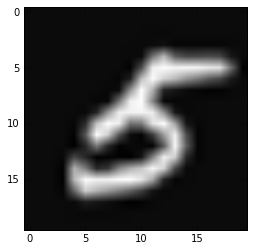

y value:  [ 3.]


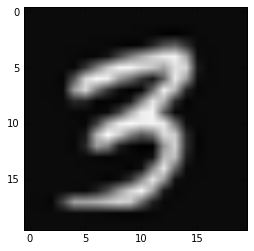

y value:  [ 8.]


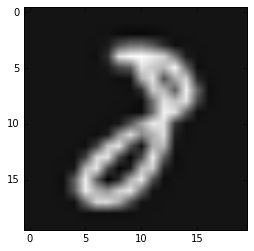

y value:  [ 9.]


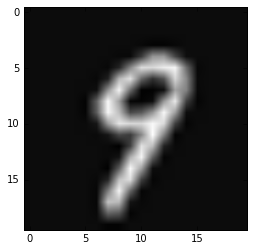

y value:  [ 9.]


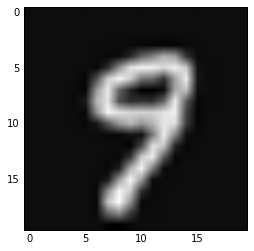

y value:  [ 9.]


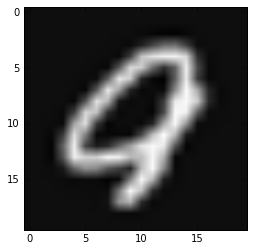

y value:  [ 7.]


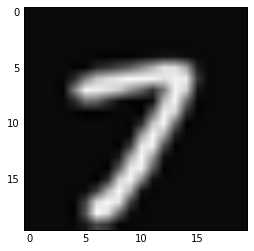

y value:  [ 8.]


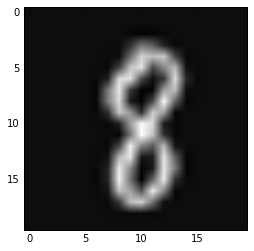

y value:  [ 10.]


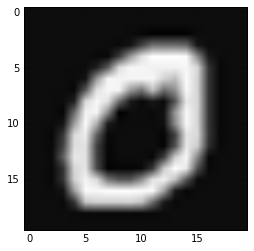

y value:  [ 4.]


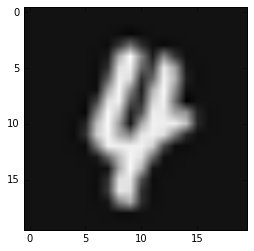

In [5]:
#import data: Consists of 5000 records of flattened out 20x20 grayscale pixels from handwritten digits.
filepath = '../ex4data1.mat'
mat_contents = sio.loadmat(filepath)
x = mat_contents['X']
y = mat_contents['y']
m,n = x.shape

#randomize records before pulling out a training and test set
xy = np.c_[x,y]
np.random.shuffle(xy)
x = xy[:,0:400]
y = xy[:,400]
y = y.reshape(m,1)

#Randomly display 10 numbers
for i in range(0,10):
    num = random.randint(1, m)
    x_line = x[num][:]
    x_line = x_line.reshape(20,20)
    x_line = np.transpose(x_line)
    print 'y value: ', y[num]
    imgplot = plt.imshow(x_line, origin = 'upper', cmap = 'gray')
    plt.show()

# Add a column of 1's to x - constant term
ones_x = np.ones_like(y)
x = np.c_[ones_x, x]
m,n = x.shape

In [6]:
# Set parameters
#(in order to check for overfitting)
#regularization term lam

lam = 1.0
frac_train = 0.7

#Number of features (n) and data points (m)
m, n = x.shape

#number of classifications
k = 10

In [7]:
#split data into training and test sets
m_train = int(m*frac_train)
xtrain = x[0:m_train, :]
xtest = x[m_train:m, :]
ytrain = y[0:m_train, :]
ytest = y[m_train:m, :]
print 'Array shape of x train and y train: ', xtrain.shape, ytrain.shape
print 'Array shape of x test and y test: ', xtest.shape, ytest.shape

Array shape of x train and y train:  (3500, 401) (3500, 1)
Array shape of x test and y test:  (1500, 401) (1500, 1)


In [8]:
#train one vs. all
#initialize all_theta which contains theta corresponding to k classifiers: for each of the k classes
all_theta = np.zeros([k,n]) + 0.0

#classifier for different k's
for value in range(0,k):
    if value == 0:
        current_k = 10
    else:
        current_k = value
    ytrain_current = ytrain == current_k
    ytrain_current = ytrain_current.astype(int)
    theta_current = all_theta[value,:]
    theta_converged = op.fmin_l_bfgs_b(CostFunction, theta_current, fprime = Gradient, args = (xtrain, ytrain_current, lam), maxiter = 2000)
    all_theta[value,:] = theta_converged[0]

Actual: 10.0
Predicted:  10


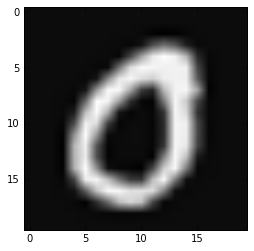

want to plot more? (y/n)
y
Actual: 1.0
Predicted:  1


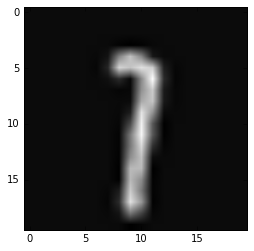

want to plot more? (y/n)
y
Actual: 6.0
Predicted:  6


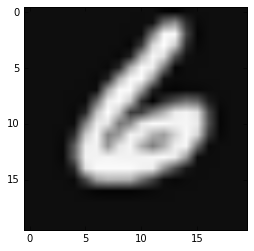

want to plot more? (y/n)
n


In [9]:
#predict a random sample from test set - keep sampling till the user tires of it!
more = 'y'
mtest = xtest.shape[0]
while more in ('y', 'Y'):
    num = random.randint(0, mtest)
    xtest_line = xtest[num,:]
    ytest_line = ytest[num,:]
    xtheta = all_theta.dot(xtest_line)
    sigxtheta = sigmoid(xtheta)
    max_index = np.argmax(sigxtheta)
    if max_index == 0:
        max_index = 10
    print 'Actual:', ytest_line[0]
    print 'Predicted: ', max_index
    #show the image
    xtest_disp = x[m_train:m, :]
    xtest_disp_line = xtest_disp[num,:]
    xtest_disp_line = xtest_disp_line[1:401]
    xtest_disp_line = xtest_disp_line.reshape(20,20)
    xtest_disp_line = np.transpose(xtest_disp_line)
    imgplot = plt.imshow(xtest_disp_line, origin = 'upper', cmap = 'gray')
    plt.show()
    print 'want to plot more? (y/n)'
    more = raw_input()
    

In [10]:
#predict and calculate F1 score
# Use the theta to estimate y using using one classifier for each class and selecting the 
# class corresponging to the classifier outputting the highest 'probability' value as the predicted y. 

ypred = np.zeros_like(ytest)

# sigmoid(x*theta) for each class gives us the predicted probability
xtheta = xtest.dot(np.transpose(all_theta))
sigxtheta = sigmoid(xtheta)
ypred = np.argmax(sigxtheta, axis=1)
#note that 0's are classified as 10 in the training and test sets
ypred[ypred==0] = 10
ypred = ypred.reshape(ytest.shape)

#F1 score - Used the 'macro' averaging, which gives unweighted average of the F1 scores corresponding to all the classes
F1_score = metrics.f1_score(ytest, ypred, average='macro')
print 'F1-Score: ', F1_score

F1-Score:  0.903725338184
